<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/4_introduccion_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de secuencias con redes neuronales recurrentes

- En general, muchos problemas en ciencia de datos, requieren del procesado de datos sencuenciales, generalmente asociados al tiempo (series de tiempo).

- En ese sentido, sea la serie de datos $\{x_t\in\mathbb{R}\}_{t=1}^T$.

- Suponga que se define el modelo predictivo probabilístico de la forma:

$$x_t \sim P(x_t|x_{t-1},\dots,x_1)$$

- En general, el estudio de datos secuenciales se puede atacar desde dos aproximaciones básicas: i) modelos autorregresivos , y ii) modelos autorregresivos de variable latente.

# Modelos autorregresivos

- Dichos modelos fijan una dependencia temporal de orden $\tau$.

- Por ende, el número de puntos requeridos para realizar predicciones para $t > \tau$ se mantiene fijo, dado que se asume:

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

# Modelos autorregresivos de variable latente

- Buscan preservar alguna representación latente (memoría) $h_t$ de las observaciones pasadas, y busca actualizar (predecir) la secuencia $x_t$ y la variable latente $h_t$, de la forma: 

$$\hat{x}_t = P(x_t|h_t)$$

$$h_t = g(h_{t-1},x_{t-1})$$

![autorregresivo](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/autorregresivo.png?raw=1)

**Nota**: $h_t$ no es observable (latente), por ende debe estimarse desde los datos.

- En estadística, el concepto de dinámica que no cambia (patrón regular) se conoce como estacionario. En este sentido, podemos tener un estimado de la secuencia completa utilizando un modelo probabilístico de la forma:

$$P(x_1,x_2,\dots,x_T) = \prod^T_{t=1}P(x_t|x_{t-1},\dots,x_1)$$
donde el estimado de la probabilidad condicional se puede realizar mediante regresores o clasficadores para eventos continuos o discretos, respectivamente.



# Modelos Markovianos

- En los modelos autorregresivos la estimación de $x_t$ se basa en una ventana de tamaño $\tau$, de la forma $x_{t-1},\dots,x_{t-\tau}$.

- Para cuando dicha aproximación es correcta, se dice que la secuencia de datos cumple con la condición Markoviana.

- Para $\tau=1$, se tiene un modelo de Markov de primer orden:

$$P(x_1,x_2,\dots,x_T)=\prod_{t=1}^T P(x_t|x_{t-1})$$
con $P(x_1|x_0)=P(x_1).$





# Ejercicio 1:

- Consultar el modelo y principio de optimización de los modelos de media móvil ([Moving average - MA](https://en.wikipedia.org/wiki/Moving-average_model)), autorregresivos de media móvil ([Autorregresive moving average - ARMA](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)) y autorregresivo integrado de media móvil ([Autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)). Cuáles son sus relaciones con los modelos Markovianos?.

# Redes neuronales recurrentes - Recurrent neural networks (RNN)

- Hasta el momento hemos trabajado con datos estructurados tipo tabla, en donde las muestras se asumen independientes e identicamente distribuidas (i.i.d.).

- Sin embargo, para datos secuenciales, la suposición i.i.d no es apropiada, y se requiren de arquitecturas que codifiquen dicha secuencialidad.

- Por ejemplo, en el caso de datos tipo imagen, la relación espacial debe ser codificada apropiadamente, como en el caso de las arquitecturas convolucionales ([Convolutional Neural Networks](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/3_RedesConvolucionales.pdf).

- En este sentido, las RNN pretenden explotar la codificación mediante variables latentes, para aproximar el modelado de la incertidumbre de la secuencia como:


$$P(x_t|x_{t-1},\dots,x_1)\approx P(x_t|h_{t-1})$$

donde el estado oculto $h_{t-1}$ (hidden state) codifica la información relevante de la secuencia hasta $t-1$.

- Además, el estado oculto en $t$ se puede calcular a partir de $x_t$ y $h_{t-1},$ como:

$$h_t=f(x_t,h_{t-1})$$

**Nota**: se podría utilizar como $h_t$ todo el vector de datos $x_t,x_{t-1},\dots,x_1$; no obstante, el costo computacional y de memoría sería muy alto.

## Las RNN son redes neuronales con estados ocultos!

- Considere una matriz (mini-lote) de $P$ características desde datos secuenciales $\mathbf{X}_t\in\mathbb{R}^{N\times P}$, es decir, tenemos $N$ trayectorias con $P$ mediciones de una secuencia en el instante $t$. 

- Sea $\mathbf{H}_t\in\mathbb{R}^{N \times h}$ la variable oculta (latente) para el instante $t$, la estimación de dicha variable respecto a la entrada actual y a la variable oculta en $t-1$ se puede modelar mediante RNN como:

$$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}+\mathbf{H}_{t-1}\mathbf{S} + \mathbf{b}),$$

donde $\mathbf{W}\in\mathbb{R}^{P \times h},$ $\mathbf{S}\in\mathbb{R}^{h \times h},$ $\mathbf{b}\in\mathbb{R}^{h}$ y $\phi(\cdot)$ es una función de activación no lineal.

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto de la forma:

$$\mathbf{O}_t = \mathbf{H}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$

**Esquema de una RNN con un estado oculto:**

![rnn](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/rnn.png?raw=1)



- A continuación se presenta algunos ejemplos sobre Tensorflow para RNN.

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

Generamos el conjunto de series de tiempo a analizar

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


In [ ]:
#-------------------------------------------------------------------------------
y_train # vector de salida
#-------------------------------------------------------------------------------

array([[-0.35489398],
       [ 0.11629631],
       [-0.35395944],
       ...,
       [ 0.04946356],
       [-0.26231018],
       [ 0.60062087]], dtype=float32)

Generamos la gráfica de las series de tiempo creadas

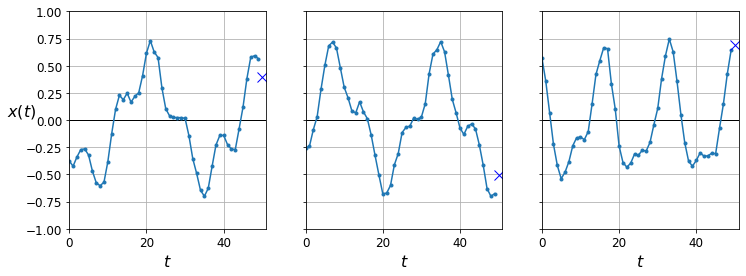

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para graficar las series------------------------------------
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
#-------------------------------------------------------------------------------
# graficamos 3 series del set validation----------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()
#-------------------------------------------------------------------------------

# Predicción ingenua (solo predecir el último valor):

- Para ilustrar el concepto de secuencialidad, utilizaremos un predictor ingenuo, en donde la salida actual sería igual al valor en el instante anterior:

$$x_t = x_{t-1}$$

In [ ]:
#-------------------------------------------------------------------------------
# asumimos que el valor ha estimar es el último elemento de la serie----------------
y_pred = X_test[:, -1]
#-------------------------------------------------------------------------------
# calculamos el MSE entre el y_valid vs. y_pred---------------------------------
print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 2.181127481162548 %


- El error cálculado no es tan grande aparentemente.

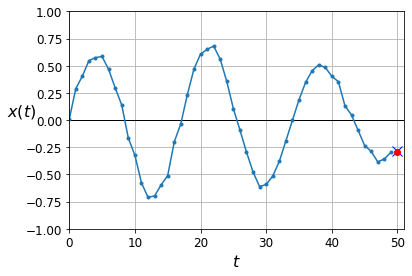

In [ ]:
#-------------------------------------------------------------------------------
# graficamos valor estimado----------------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicción lineal

- Ahora utilizaremos un modelo lineal simple.

- Recuerde que como generamos ventanas, podrimos entender esta aproximación como un modelo autorregresivo simple (sin variables latentes): 

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

donde la estimación de la condicional se realiza mediante un regresor con capas densas.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


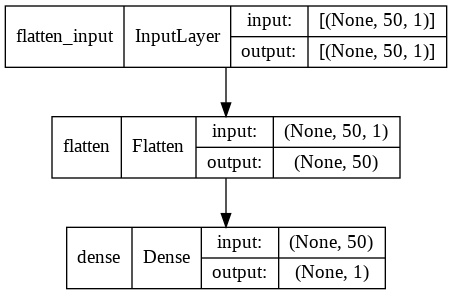

In [ ]:
#-------------------------------------------------------------------------------
# definimos un modelo secuencial------------------------------------------------
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
#-------------------------------------------------------------------------------
model.summary()
#-------------------------------------------------------------------------------
keras.utils.plot_model(model, "my_model_series.png", show_shapes=True)
#-------------------------------------------------------------------------------

Compilamos y ajustamos el modelo usando los datos de train y validation

In [ ]:
epochs = 2
#-------------------------------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/2
219/219 [==============================] - 4s 4ms/step - loss: 0.1001 - val_loss: 0.0545
Epoch 2/2
219/219 [==============================] - 1s 4ms/step - loss: 0.0379 - val_loss: 0.0266


In [ ]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 2.6731006801128387 %


El resultado es mucho mejor que el predictor ingenuo.

Graficamos el desempeño del modelo secuencial

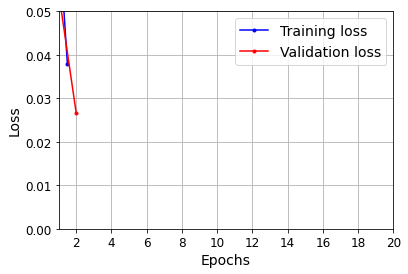

In [ ]:
#-------------------------------------------------------------------------------
# definimos una función para plot de curvas de aprendizaje----------------------
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
#-------------------------------------------------------------------------------
# llamamos función de plot------------------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

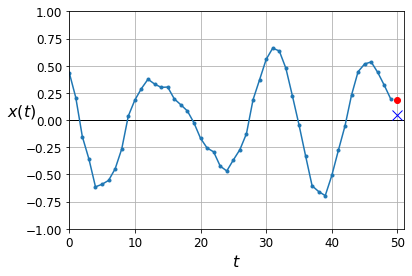

In [ ]:
#-------------------------------------------------------------------------------
# pintamos series y predicciones------------------------------------------------
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicciones con RNN 

- Keras tiene implementado las [capas simples de RNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/).

- Por defecto la activación no lineal utilizada es la `tanh`, aunque se puede trabajar con las vistas en módulos anteriore

- En este caso se define una única capa RNN con una neurona, dado que tenemos una única salida a predecir.

In [ ]:
#-------------------------------------------------------------------------------
# definimos modelo secuencial de RNN simple-------------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1], ) 
])
#-------------------------------------------------------------------------------
# compilamos el modelo RNN------------------------------------------------------
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
#-------------------------------------------------------------------------------
# entrenamos el modelo y lo ajustamos con los datos de valid--------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/2
219/219 [==============================] - 16s 70ms/step - loss: 0.0313 - val_loss: 0.0127
Epoch 2/2
219/219 [==============================] - 15s 69ms/step - loss: 0.0119 - val_loss: 0.0112


In [ ]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 1.1670157313346863 %


Graficamos el performance de la Simple RNN

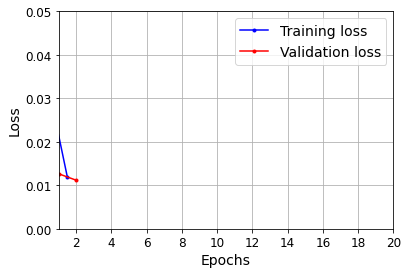

In [ ]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

Se analiza la predicción

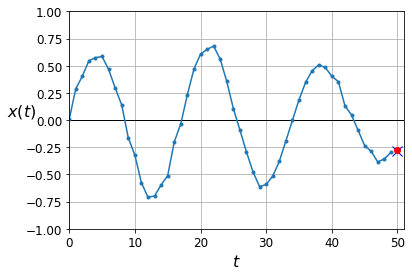

In [ ]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_test)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Deep RNNs

- Un modelo profundo de RNN contiene $L$ capas oculta.

- Sobre cada capa oculta, el estado oculto es actualizado y se pasa al siguiente instante de tiempo de la capa actual y de la capa siguiente, como se muestra en la siguiente figura:

![deeprnn](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/deeprnn.png?raw=1)

- El modelo recurrente profundo se define entonces como:

$$\mathbf{H}^{(l)}_t = \phi_l\left(\mathbf{H}^{(l-1)}_t \mathbf{W}^{(l)}+\mathbf{H}^{(l)}_{t-1}\mathbf{S}^{(l)} + \mathbf{b}^{(l)}\right),$$

donde $\mathbf{W}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_l},$ $\mathbf{S}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_{l-1}},$ $\mathbf{b}\in\mathbb{R}^{h_l}$ y $\phi_l(\cdot)$ es una función de activación no lineal. $\mathbf{H}^{(0)}_t=\mathbf{X}_t$

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto en la capa oculta $L$:

$$\mathbf{O}_t = \mathbf{H}^{(L)}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h_L\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$


**Nota:** para aplicar la capa densa de la salida, se puede utilizar una capa `SimpleRNN(1)` con una neurona, o una capa densa aplicada desde la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para preservar la temporalidad de los datos.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


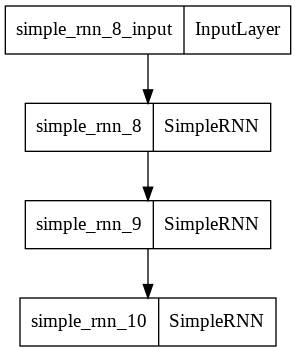

In [ ]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

# Ejercicio 2

- Para el modelo definido, determine los tamaños de las matrices y vectores de bias en cada capa.

**Nota**: Utilice el método `model.layers[l].get_weights()`

In [ ]:
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/2
219/219 [==============================] - 49s 215ms/step - loss: 2.1655 - val_loss: 0.1178
Epoch 2/2
219/219 [==============================] - 47s 215ms/step - loss: 0.0861 - val_loss: 0.0593


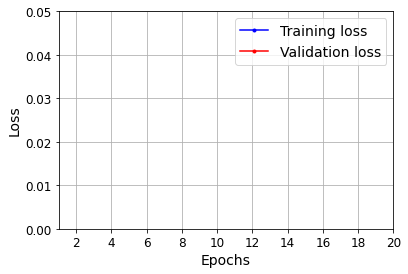

In [ ]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
y_train.shape

(7000, 1)

In [ ]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
#print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------
y_pred.shape

(1000, 1)

Graficamos el performance de la Deep RNN

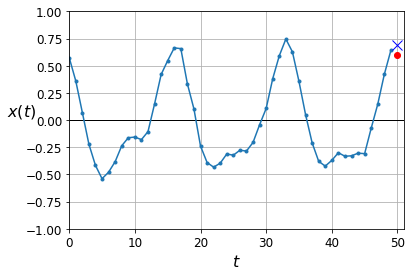

In [ ]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_valid)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicir un horizonte más lejano

In [ ]:
#-------------------------------------------------------------------------------
# definimos nueva semilla aleatoria---------------------------------------------
np.random.seed(43) # not 42, as it would give the first series in the train set
#-------------------------------------------------------------------------------
# generamos nueva series de tiempo----------------------------------------------
series       = generate_time_series(1, n_steps + 10)     # horizonte de 10 valores en el tiempo
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X            = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
Y_pred = X[:, n_steps:]
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# observamos nuevas dimensiones de Y_pred---------------------------------------
Y_pred.shape #horizonte de 10 valores en el tiempo
#-------------------------------------------------------------------------------

(1, 10, 1)

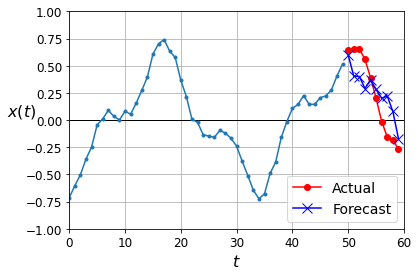

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para pintar forecast----------------------------------------
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
#-------------------------------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

Usemos el modelo para predecir los siguientes 10 valores. Se requiere entonces generar nuevamente la secuencia con 9 pasos más en el tiempo.

In [ ]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
print('Series dimension:',series.shape)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, Y_train.shape)
print('Valid dimensions:',X_valid.shape, Y_valid.shape)
print('Test dimensions:',X_test.shape, Y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 60, 1)
Train dimensions: (7000, 50, 1) (7000, 10)
Valid dimensions: (2000, 50, 1) (2000, 10)
Test dimensions: (1000, 50, 1) (1000, 10)


Predicción de los siguientes 10 valores (uno a uno y concatenar):

In [ ]:
#-------------------------------------------------------------------------------
# realizamos predicción usando modelo Deep RNN----------------------------------
del X
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
# obtenemos las predicciones de los siguientes 10 valores-----------------------
Y_pred = X[:, n_steps:, 0]
#-------------------------------------------------------------------------------
print('Y_pred dimensions:', Y_pred.shape)
#-------------------------------------------------------------------------------

Y_pred dimensions: (2000, 10)


In [ ]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))
#-------------------------------------------------------------------------------

0.16511896

Ahora se crea una RNN que permita predecir los siguientes 10 valores en una sola evaluación (predicción multi-salida):

In [ ]:
#-------------------------------------------------------------------------------
# definimos semillas aleatorias-------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
# definimos el modelo secuencial multi-salida-----------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10) # capa densa para estimar los siguientes 10 valores
])
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 [==============================] - 26s 110ms/step - loss: 0.0669 - val_loss: 0.0317
Epoch 2/20
219/219 [==============================] - 24s 110ms/step - loss: 0.0265 - val_loss: 0.0200
Epoch 3/20
219/219 [==============================] - 24s 109ms/step - loss: 0.0183 - val_loss: 0.0160
Epoch 4/20
219/219 [==============================] - 24s 109ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 5/20
219/219 [==============================] - 24s 110ms/step - loss: 0.0139 - val_loss: 0.0118
Epoch 6/20
219/219 [==============================] - 24s 109ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 7/20
219/219 [==============================] - 24s 110ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 8/20
219/219 [==============================] - 24s 111ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 9/20
219/219 [==============================] - 24s 112ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 24s 110ms/step - l

In [ ]:
#-------------------------------------------------------------------------------
# generamos nuevos datos, con nueva semilla aleatoria---------------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva serie de tiempo-----------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
#-------------------------------------------------------------------------------
print('X_new dimensions:',X_new.shape)
print('Y_new dimensions:',Y_new.shape)
#-------------------------------------------------------------------------------
# hacemos predicción de los 10 últimos valores----------------------------------
Y_pred       = model.predict(X_new)[..., np.newaxis]
print('Y_pred dimensions:',Y_pred.shape)
#-------------------------------------------------------------------------------

X_new dimensions: (1, 50, 1)
Y_new dimensions: (1, 10, 1)
Y_pred dimensions: (1, 10, 1)


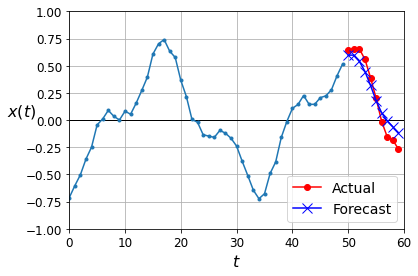

In [ ]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

# El problema de las dependencias a largo plazo

- Uno de los atractivos de los RNN es la idea de conectar la información anterior a la tarea actual. Si los RNN pudieran hacer esto, serían extremadamente útiles. **¿Pero pueden ellos? Depende.**

- A veces, solo necesitamos mirar información reciente para realizar la tarea actual. 

- Por ejemplo, considere un modelo de lenguaje que intenta predecir la siguiente palabra basándose en las anteriores. Si estamos tratando de predecir la última palabra en la oración:

 "las nubes están en el cielo", 
 
no necesitamos ningún contexto adicional; es bastante obvio que la siguiente palabra será **cielo**. 

- En tales casos, donde la brecha entre la información relevante y el lugar que se necesita es pequeña, los RNN pueden aprender a usar la información del pasado.

![rnn_corto](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/rnn_corto.png?raw=1)

- Pero también hay casos en los que necesitamos más contexto. Considere intentar predecir la última palabra del texto: 

"Crecí en Francia ... hablo francés con fluidez", 

la información reciente sugiere que la siguiente palabra es probablemente el **nombre de un idioma**, pero si queremos delimitar qué idioma, necesitamos el contexto de Francia, desde más atrás. 

- Entonces, la brecha entre la información relevante y el punto donde se necesita puede ser grande.

![rnn_largo](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/rnn_largo.png?raw=1)

- En teoría, los RNN son capaces de manejar tales "dependencias a largo plazo". Lamentablemente, en la práctica, los RNN no parecen ser capaces de aprenderlos.

# [LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/): Long short term memory

- La LSTM pretende aprender dependencias largas.

- A diferencia de una capa RNN simple, las LSTMs presenta cuatro (4) capas interactuando:


![lstm](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/lstm.png?raw=1)

con:

$$\mathbf{I}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xi}+\mathbf{H}_{t-1}\mathbf{W}_{hi}+\mathbf{b}_i\right)$$
$$\mathbf{F}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xf}+\mathbf{H}_{t-1}\mathbf{W}_{hf}+\mathbf{b}_f\right)$$
$$\mathbf{O}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xo}+\mathbf{H}_{t-1}\mathbf{W}_{ho}+\mathbf{b}_o\right)$$
$$\tilde{\mathbf{C}}_t = \tanh\left(\mathbf{X}_t\mathbf{W}_{xc}+\mathbf{H}_{t-1}\mathbf{W}_{hc}+\mathbf{b}_c\right)$$
$${\mathbf{C}}_t = \mathbf{F}_t \odot \mathbf{C}_{t-1} + \mathbf{I}_t \odot \tilde{\mathbf{C}}_t $$

donde $\mathbf{W}_{xi},\mathbf{W}_{xf},\mathbf{W}_{xo}, \mathbf{W}_{xc}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hi},\mathbf{W}_{hf},\mathbf{W}_{ho},\mathbf{W}_{hc}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{i},\mathbf{b}_{f},\mathbf{b}_{o}, \mathbf{b}_{c}\in\mathbb{R}^{h}$

In [ ]:
#-------------------------------------------------------------------------------
# generamos los datos-----------------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
# generamos series de tiempo----------------------------------------------------
n_steps = 50
series  = generate_time_series(10000, n_steps + 10)
print('Series dimensions:',series.shape)
#-------------------------------------------------------------------------------
# partimos los datos en train/valid/test----------------------------------------
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test  = series[9000:, :n_steps]
print('X_train dimensions:',X_train.shape)
print('X_valid dimensions:',X_valid.shape)
print('X_test dimensions:',X_test.shape)
#-------------------------------------------------------------------------------
# definimos nuevos Y------------------------------------------------------------
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
print('Y dimensions:',Y.shape)
#-------------------------------------------------------------------------------
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test  = Y[9000:]
#-------------------------------------------------------------------------------
print('Y_train dimensions:', Y_train.shape)
print('Y_valid dimensions:',Y_valid.shape)
print('Y_test dimensions:',Y_test.shape)
#-------------------------------------------------------------------------------

Series dimensions: (10000, 60, 1)
X_train dimensions: (7000, 50, 1)
X_valid dimensions: (2000, 50, 1)
X_test dimensions: (1000, 50, 1)
Y dimensions: (10000, 50, 10)
Y_train dimensions: (7000, 50, 10)
Y_valid dimensions: (2000, 50, 10)
Y_test dimensions: (1000, 50, 10)


In [ ]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])
#-------------------------------------------------------------------------------
# definimos el modelo secuencial con 2 capas LSTM-------------------------------
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
#-------------------------------------------------------------------------------
# entrenamos y validamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 [==============================] - 11s 26ms/step - loss: 0.0760 - last_time_step_mse: 0.0615 - val_loss: 0.0554 - val_last_time_step_mse: 0.0364
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0480 - last_time_step_mse: 0.0283 - val_loss: 0.0427 - val_last_time_step_mse: 0.0222
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0391 - last_time_step_mse: 0.0181 - val_loss: 0.0367 - val_last_time_step_mse: 0.0157
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0350 - last_time_step_mse: 0.0151 - val_loss: 0.0334 - val_last_time_step_mse: 0.0132
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0325 - last_time_step_mse: 0.0133 - val_loss: 0.0314 - val_last_time_step_mse: 0.0121
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0308 - last_time_step_mse: 0.0122 - val_loss: 0.0298 - val_last_time_step_mse: 0.0112
Epoch 7/20
219/219 [=

In [ ]:
#-------------------------------------------------------------------------------
# evaluamos el modelo sobre los datos de Valid----------------------------------
model.evaluate(X_valid, Y_valid)
#-------------------------------------------------------------------------------

63/63 [==============================] - 1s 9ms/step - loss: 0.0238 - last_time_step_mse: 0.0086


[0.023788688704371452, 0.008560806512832642]

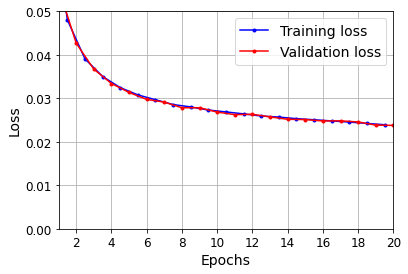

In [ ]:
#-------------------------------------------------------------------------------
# observamos las curvas de aprendizaje del modelo-------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# generamos una nueva serie de tiempo para testear el modelo--------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva sample--------------------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
#-------------------------------------------------------------------------------
# realizamos predicción---------------------------------------------------------
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
#-------------------------------------------------------------------------------

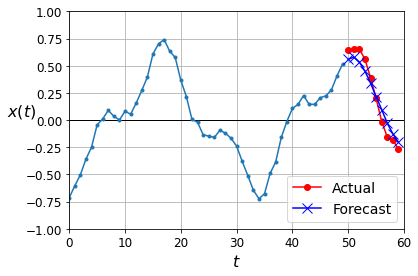

In [ ]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

# [GRU](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be): Gated Recurrent Unit


![gru](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/gru.png?raw=1)

- La GRU puede entenderse como una extensión de la capa LSTM para evitar problemas de convergencia en el gradiente.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 9s 25ms/step - loss: 0.0738 - last_time_step_mse: 0.0655 - val_loss: 0.0538 - val_last_time_step_mse: 0.0450
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0476 - last_time_step_mse: 0.0367 - val_loss: 0.0441 - val_last_time_step_mse: 0.0326
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0417 - last_time_step_mse: 0.0301 - val_loss: 0.0390 - val_last_time_step_mse: 0.0275
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0368 - last_time_step_mse: 0.0243 - val_loss: 0.0339 - val_last_time_step_mse: 0.0202
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0326 - last_time_step_mse: 0.0180 - val_loss: 0.0312 - val_last_time_step_mse: 0.0164
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0306 - last_time_step_mse: 0.0155 - val_loss: 0.0294 - val_last_time_step_mse: 0.0143
Epoch 7/20
219/219 [==

In [ ]:
model.evaluate(X_valid, Y_valid)

63/63 [==============================] - 1s 9ms/step - loss: 0.0238 - last_time_step_mse: 0.0103


[0.023785501718521118, 0.010262805968523026]

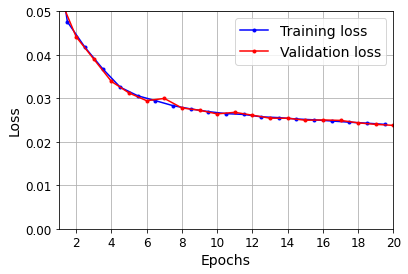

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

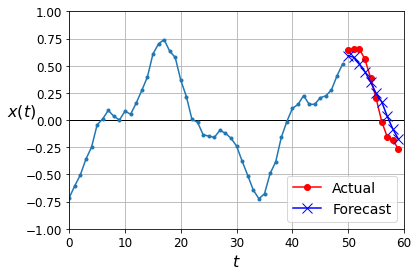

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()